Dataset shape: (309, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Unnamed: 0             309 non-null    int64
 1   GENDER                 309 non-null    int64
 2   AGE                    309 non-null    int64
 3   SMOKING                309 non-null    int64
 4   YELLOW_FINGERS         309 non-null    int64
 5   ANXIETY                309 non-null    int64
 6   PEER_PRESSURE          309 non-null    int64
 7   CHRONIC DISEASE        309 non-null    int64
 8   FATIGUE                309 non-null    int64
 9   ALLERGY                309 non-null    int64
 10  WHEEZING               309 non-null    int64
 11  ALCOHOL CONSUMING      309 non-null    int64
 12  COUGHING               309 non-null    int64
 13  SHORTNESS OF BREATH    309 non-null    int64
 14  SWALLOWING DIFFICULTY  309 non-null    int64
 15  CHEST PAIN     

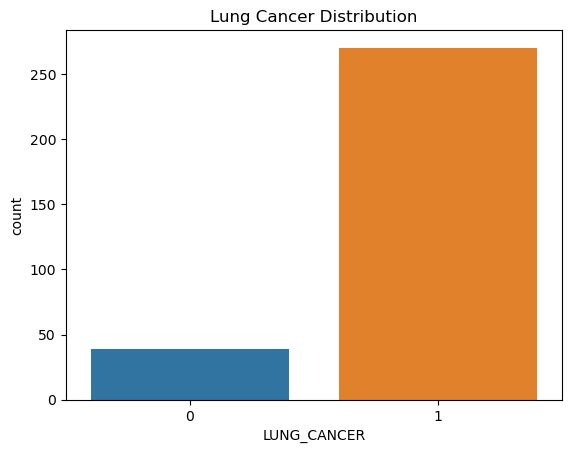

Train shape: (247, 16) Test shape: (62, 16)
Best Random Forest Params: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': None}
Random Forest Accuracy: 0.8709677419354839
              precision    recall  f1-score   support

           0       0.50      0.25      0.33         8
           1       0.90      0.96      0.93        54

    accuracy                           0.87        62
   macro avg       0.70      0.61      0.63        62
weighted avg       0.85      0.87      0.85        62

Lung Cancer Random Forest model saved successfully!
Best Logistic Regression Params: {'C': 10, 'penalty': 'l1'}
Logistic Regression Accuracy: 0.8870967741935484
              precision    recall  f1-score   support

           0       0.57      0.50      0.53         8
           1       0.93      0.94      0.94        54

    accuracy                           0.89        62
   macro avg       0.75      0.72      0.73        62
weighted avg       0.88      0.89      

In [6]:
# %% [markdown]
# # Lung Cancer Model: Comparison of 3 Models
#
# This notebook loads the lung cancer dataset, performs EDA and preprocessing, trains three models (Random Forest, Logistic Regression, and SVM) with hyperparameter tuning, evaluates them, and saves each model.

# %%
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

os.makedirs("Models", exist_ok=True)

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import joblib

# %%
# Load the lung cancer dataset
df = pd.read_csv(r"C:\Users\pc\Desktop\med\Datasets\prepocessed_lungs_data.csv")
print("Dataset shape:", df.shape)
df.head()

# %%
# Basic EDA
df.info()
print(df.describe())
print("Missing values:\n", df.isnull().sum())

# Assuming the target column is 'Cancer'
sns.countplot(x='LUNG_CANCER', data=df)
plt.title("Lung Cancer Distribution")
plt.show()


# %%
# Data Preprocessing
df.fillna(df.mean(), inplace=True)

# %%
# Split features and target
X = df.drop("LUNG_CANCER", axis=1)
y = df["LUNG_CANCER"]

# %%
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

# %% [markdown]
# ### Model 1: Random Forest

# %%
param_dist_rf = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf = RandomForestClassifier(random_state=42)
rf_random = RandomizedSearchCV(
    rf, param_dist_rf, n_iter=10, cv=5,
    scoring='accuracy', random_state=42, n_jobs=-1
)
rf_random.fit(X_train, y_train)
best_rf = rf_random.best_estimator_
print("Best Random Forest Params:", rf_random.best_params_)

y_pred_rf = best_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)
print(classification_report(y_test, y_pred_rf))

joblib.dump(best_rf, "Models/lung_cancer_rf_model.pkl")
print("Lung Cancer Random Forest model saved successfully!")

# %% [markdown]
# ### Model 2: Logistic Regression

# %%
lr = LogisticRegression(solver='liblinear', max_iter=1000)
param_grid_lr = {'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2']}
lr_grid = GridSearchCV(lr, param_grid_lr, cv=5, scoring='accuracy', n_jobs=-1)
lr_grid.fit(X_train, y_train)
best_lr = lr_grid.best_estimator_
print("Best Logistic Regression Params:", lr_grid.best_params_)

y_pred_lr = best_lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", accuracy_lr)
print(classification_report(y_test, y_pred_lr))

joblib.dump(best_lr, "Models/lung_cancer_lr_model.pkl")
print("Lung Cancer Logistic Regression model saved successfully!")

# %% [markdown]
# ### Model 3: Support Vector Machine

# %%
svc = SVC(probability=True)
param_grid_svc = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']}
svc_grid = GridSearchCV(svc, param_grid_svc, cv=5, scoring='accuracy', n_jobs=-1)
svc_grid.fit(X_train, y_train)
best_svc = svc_grid.best_estimator_
print("Best SVM Params:", svc_grid.best_params_)

y_pred_svc = best_svc.predict(X_test)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print("SVM Accuracy:", accuracy_svc)
print(classification_report(y_test, y_pred_svc))

joblib.dump(best_svc, "Models/lung_cancer_svc_model.pkl")
print("Lung Cancer SVM model saved successfully!")

# %%
print("Comparison of Models for Lung Cancer:")
print(f"Random Forest: {accuracy_rf:.4f}")
print(f"Logistic Regression: {accuracy_lr:.4f}")
print(f"SVM: {accuracy_svc:.4f}")


In [5]:
df.columns = df.columns.str.strip()
